In [1]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
latent_dim = 64
hidden_dim = 256
image_size = 28 * 28 # MNIST images are 28x28
num_epochs = 50
batch_size = 64
learning_rate = 2e-4

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, image_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
        def forward(self, x):
          return self.model(x)



# Initialize models and optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=learning_rate)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Prepare real images and fake images
        real_images = images.view(-1, image_size).to(device)
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Prepare real images and fake images
        real_images = images.to(device)  # No need to reshape
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        # Train Discriminator
        d_optimizer.zero_grad()
        real_outputs = discriminator(real_images.view(-1, image_size))
        d_real_loss = loss_fn(real_outputs, real_labels)
        z = torch.randn(images.size(0), latent_dim).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())  # Detach to avoid backpropagating through the generator
        d_fake_loss = loss_fn(fake_outputs, fake_labels)
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        z = torch.randn(images.size(0), latent_dim).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = loss_fn(outputs, real_labels)  # Use real labels for the generator loss
        g_loss.backward()
        g_optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')



# Generate and display images
with torch.no_grad():
    z = torch.randn(9, latent_dim).to(device)
    fake_images = generator(z).reshape(-1, 1, 28, 28)
    fake_images = (fake_images + 1) / 2  # Rescale images from [-1, 1] to [0, 1]
    fake_images = fake_images.cpu().numpy()
    figure, axs = plt.subplots(3, 3, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(np.squeeze(fake_images[i]), cmap='gray')
        ax.axis('off')
    plt.show()

100%|██████████| 9912422/9912422 [00:00<00:00, 67457119.01it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18101568.11it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 15730805.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11160239.47it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



NotImplementedError: Module [Discriminator] is missing the required "forward" function

Epoch [1/50], d_loss: 0.2050, g_loss: 3.7913
Epoch [2/50], d_loss: 0.5608, g_loss: 3.3970
Epoch [3/50], d_loss: 1.3388, g_loss: 1.2465
Epoch [4/50], d_loss: 0.4252, g_loss: 2.4438
Epoch [5/50], d_loss: 0.3863, g_loss: 1.6810
Epoch [6/50], d_loss: 0.2163, g_loss: 3.1383
Epoch [7/50], d_loss: 0.6751, g_loss: 3.7511
Epoch [8/50], d_loss: 0.2008, g_loss: 3.9331
Epoch [9/50], d_loss: 0.5287, g_loss: 2.4553
Epoch [10/50], d_loss: 0.2763, g_loss: 3.8464
Epoch [11/50], d_loss: 0.6724, g_loss: 2.9592
Epoch [12/50], d_loss: 0.5359, g_loss: 2.8960
Epoch [13/50], d_loss: 0.4952, g_loss: 2.4889
Epoch [14/50], d_loss: 0.5573, g_loss: 2.7314
Epoch [15/50], d_loss: 0.6607, g_loss: 1.7420
Epoch [16/50], d_loss: 0.4429, g_loss: 2.8249
Epoch [17/50], d_loss: 0.6815, g_loss: 1.7366
Epoch [18/50], d_loss: 0.6873, g_loss: 2.5970
Epoch [19/50], d_loss: 0.6495, g_loss: 2.2603
Epoch [20/50], d_loss: 0.8263, g_loss: 2.3062
Epoch [21/50], d_loss: 1.2232, g_loss: 1.5664
Epoch [22/50], d_loss: 0.7758, g_loss: 1.80

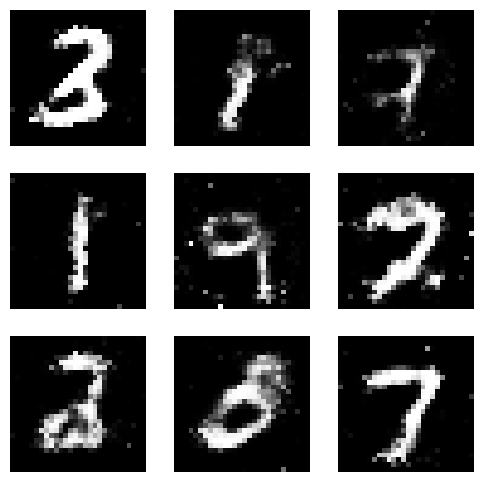

In [2]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
latent_dim = 64
hidden_dim = 256
image_size = 28 * 28  # MNIST images are 28x28
num_epochs = 50
batch_size = 64
learning_rate = 2e-4

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, image_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator().to(device)
discriminator = Discriminator().to(device)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=learning_rate)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Prepare real images and fake images
        real_images = images.to(device)
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        # Train Discriminator
        d_optimizer.zero_grad()
        real_outputs = discriminator(real_images.view(-1, image_size))
        d_real_loss = loss_fn(real_outputs, real_labels)
        z = torch.randn(images.size(0), latent_dim).to(device)
        fake_images = generator(z)
        fake_outputs = discriminator(fake_images.detach())  # Detach to avoid backpropagating through the generator
        d_fake_loss = loss_fn(fake_outputs, fake_labels)
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        z = torch.randn(images.size(0), latent_dim).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = loss_fn(outputs, real_labels)  # Use real labels for the generator loss
        g_loss.backward()
        g_optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

# Generate and display images
with torch.no_grad():
    z = torch.randn(9, latent_dim).to(device)
    fake_images = generator(z).reshape(-1, 1, 28, 28)
    fake_images = (fake_images + 1) / 2  # Rescale images from [-1, 1] to [0, 1]
    fake_images = fake_images.cpu().numpy()
    figure, axs = plt.subplots(3, 3, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        ax.imshow(np.squeeze(fake_images[i]), cmap='gray')
        ax.axis('off')
    plt.show()
